# Video Game Sales Analysis Project
## Project Overview

In this project, I will analyze video game sales data to identify patterns that determine a game's success. This information will be used to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Check for duplicate entries
df.duplicated().sum()

0

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [7]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [8]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The columns representing the year the games were released and critic score should be integers, but before changing their types, null values have to be filled. The genre, rating, and platform columns should also be categorical.

In [9]:
null_values = df.isnull()
null_values.sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# Null values need to be filled before changing numerical data types
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')
df['critic_score'] = df['critic_score'].fillna(0).astype('int')
df['genre'] = df['genre'].astype('category')
df['platform'] = df['platform'].astype('category')
df['rating'] = df['rating'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16715 non-null  int64   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     16715 non-null  int64   
 9   user_score       10014 non-null  object  
 10  rating           9949 non-null   category
dtypes: category(3), float64(4), int64(2), object(2)
memory usage: 1.1+ MB


In [11]:
# Checking null values after changes were made in the previous cell.
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

In [12]:
# Verifying the number of unique values in each column.
df.nunique()

name               11559
platform              31
year_of_release       38
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          83
user_score            96
rating                 8
dtype: int64

In [13]:
# Checking all unique values in the user score column.
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.1       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

There are a lot of missing values present in the data set, the user citic column especially, with over 50% of its values missing. However, it along with the year of release column were imputed with zeros, as this was needed in order to change their data types. As for the other columns, I will be analyzing them below.


### 2.3 Handling Missing Values

In [15]:
# Examine missing values
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

In [16]:
# Calculate percentage of missing values
null_count = df.isnull().sum()
null_percentage = (null_count/len(df))*100
null_percentage

name                0.011965
platform            0.000000
year_of_release     0.000000
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.000000
user_score         40.089740
rating             40.478612
dtype: float64

In [17]:
# Analysis of Missing Values
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,NaN,NaN


In [18]:
df[df['user_score'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,0,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,0,NaN,NaN


In [19]:
df[df['rating'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,0,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,0,NaN,NaN


In [20]:
df[(df['user_score'].isna()) & (df['rating'].notna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.20,0.28,85,NaN,T
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.00,0.13,88,NaN,E
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.00,0.10,83,NaN,E
957,Diablo III,PS4,2014,Role-Playing,0.51,0.98,0.06,0.28,0,NaN,M
1981,Monster Rancher 2,PS,1998,Simulation,0.19,0.13,0.66,0.07,83,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16474,John Daly's ProStroke Golf,X360,2010,Sports,0.01,0.00,0.00,0.00,57,NaN,E
16502,Aladdin Magic Racer,Wii,2011,Racing,0.01,0.00,0.00,0.00,0,NaN,E
16550,Superstars V8 Racing,X360,2009,Racing,0.00,0.01,0.00,0.00,62,NaN,E
16551,Winning Eleven: Pro Evolution Soccer 2007,PC,2006,Sports,0.00,0.01,0.00,0.00,88,NaN,E


In [21]:
df[(df['rating'].isna()) & (df['user_score'].notna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
693,Tomb Raider II,PC,1997,Action,0.91,1.25,0.00,0.13,0,8.3,NaN
822,R4: Ridge Racer Type 4,PS,1998,Racing,0.68,0.46,0.79,0.13,88,9.2,NaN
1763,Football Manager 2013,PC,2012,Sports,0.00,0.95,0.00,0.21,86,6.7,NaN
2054,Monster Rancher,PS,1997,Simulation,0.12,0.08,0.74,0.07,86,8.3,NaN
2843,Jampack Winter 2001,PS2,2001,Misc,0.35,0.28,0.00,0.09,0,tbd,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN
16512,Colin McRae Rally 04,PC,2004,Racing,0.00,0.01,0.00,0.00,87,7.2,NaN
16655,Summer Athletics,PC,2008,Sports,0.00,0.01,0.00,0.00,0,tbd,NaN
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NaN


In [22]:
# Handle missing values based on analysis
df = df.dropna(subset=['name', 'genre'])
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

In [23]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9123
rating             6764
dtype: int64

In [24]:
value_to_drop = 0
column = 'year_of_release'
index_names = df[df[column]==value_to_drop].index
df.drop(index_names, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     16444 non-null  int64   
 9   user_score       7463 non-null   float64 
 10  rating           9768 non-null   category
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 1.2+ MB


In [25]:
df['rating'] = df['rating'].cat.add_categories('unrated')
df['rating'] = df['rating'].fillna('unrated')

In [26]:
df['rating'].value_counts()

unrated    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

### Data Preparation Summary

Before diving into the analysis, I made several changes to clean up and organize the dataset so that it’s easier to work with.

#### Changes Made:
- Changed all column names to lowercase.
- Converted the `year_of_release` and `critic_score` columns from float to integer by filling in missing values with zeros.
- Converted `platform`, `genre`, and `rating` columns to categorical data types since they represent categories.
- Identified and began cleaning up `user_score`, which had a mix of numbers and the string `'tbd'`.

---

### Missing Values Overview

As stated above, several columns had missing data, so I took time to figure out what was missing, why it might be missing, and how to handle it:

| Column            | What Was Missing                        | Why It Might Be Missing                         | How I Handled It                                          |
|-------------------|------------------------------------------|--------------------------------------------------|-----------------------------------------------------------|
| `name`            | 2 rows missing                           | Possibly incomplete or data entry errors         | Dropped these rows — the name is essential for analysis.  |
| `year_of_release` | A few hundred missing                    | Might be older games or entries with bad data    | Dropped rows since the release year is needed for trends. |
| `genre`           | 2 rows missing                           | Likely data entry errors                         | Dropped these — genre is important for grouping.          |
| `critic_score`    | About 50% missing                        | Game wasn’t reviewed or data wasn’t recorded     | Filled missing values with zeroes |
| `user_score`      | About 40% missing with over 2,400 marked as `'tbd'` (to be determined) | Score wasn’t available yet or pending         | Replaced `'tbd'` with `NaN`, then converted to float.     |
| `rating`          | Over 40% missing                       | Game wasn’t rated or wasn’t required to be rated | Filled missing values with `'unrated'` as a new category. |

I chose each strategy based on how important the column is for the analysis, how much data was missing, and what made the most sense based on how the data will be used. For instance, I felt that it wouldn't impact my analysis if I deleted missing values in the `'year_of_release'` and `'name'` columns due to their percentages of missing data being low. I also saw that the analysis would include looking at trends in different years and felt it wouldn't make sense to keep missing data since we don't actually know the year of release.

---.



### 2.4 Calculate Total Sales

In [27]:
# Calculate total sales across all regions and put them in a different column
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,unrated,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [28]:
# Create a DataFrame with game releases by year
games_by_year = df.groupby('year_of_release')['name'].count().reset_index(name='release_count')
games_by_year

,year_of_release,release_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


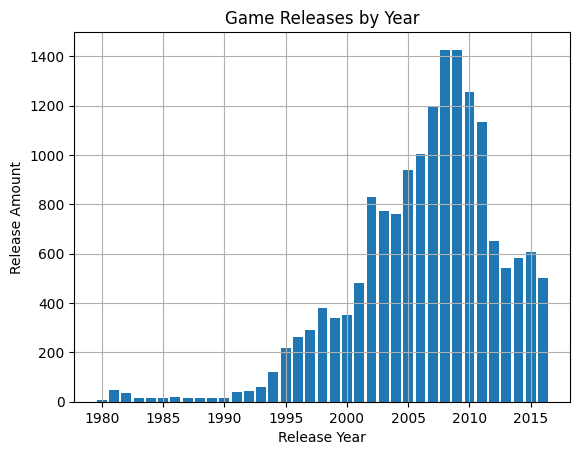

In [29]:
# Visualize the distribution of games across years
plt.bar(games_by_year['year_of_release'],games_by_year['release_count'])
plt.title('Game Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Release Amount')
plt.grid(True)
plt.show()

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [30]:
# Calculate total sales by platform and year
total_sales_py = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
total_sales_py

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
1142,XOne,2012,0.00
1143,XOne,2013,18.96
1144,XOne,2014,54.07
1145,XOne,2015,60.14


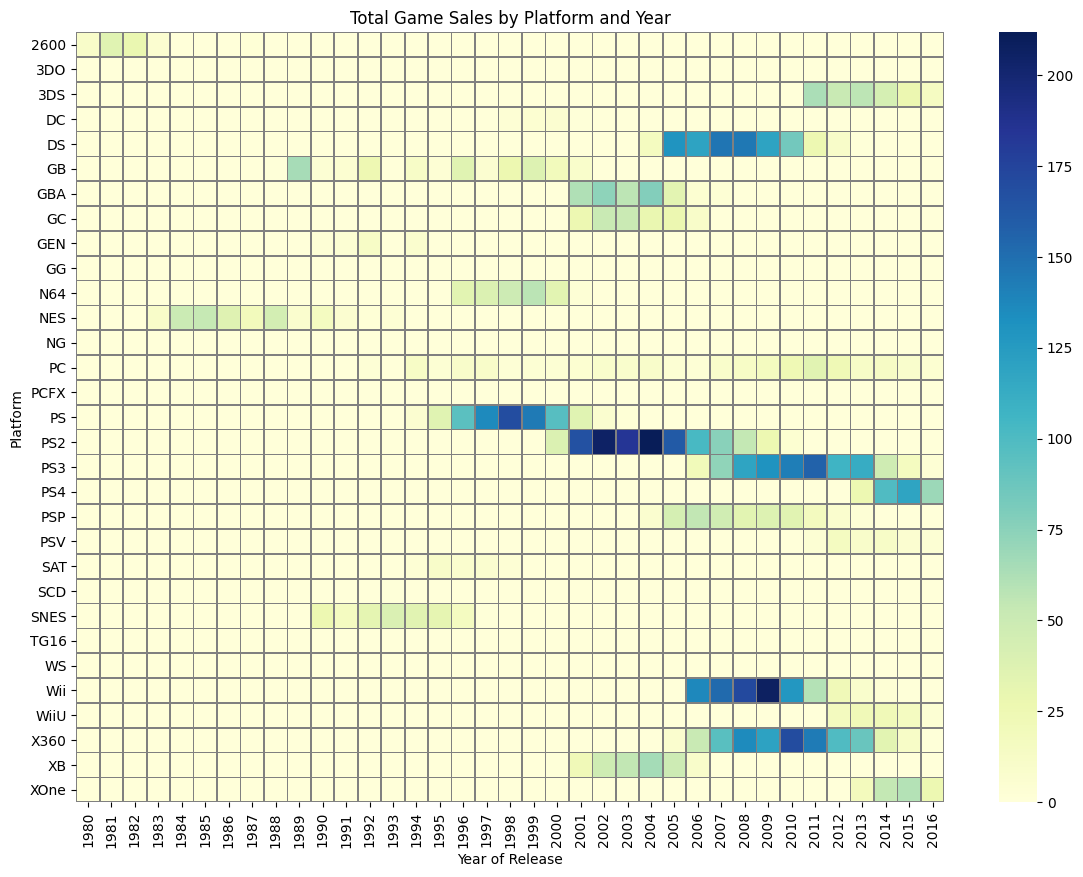

In [31]:
# Create a heatmap of platform sales over time
sales_pivot = total_sales_py.pivot(index='platform', columns='year_of_release', values='total_sales')
plt.figure(figsize=(14, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Total Game Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.show()

In [32]:
platform_sales = total_sales_py.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(6).index.tolist()
top_sales_by_year = total_sales_py[total_sales_py['platform'].isin(top_platforms)].copy()
top_sales_by_year['platform'] = top_sales_by_year['platform'].cat.remove_unused_categories()

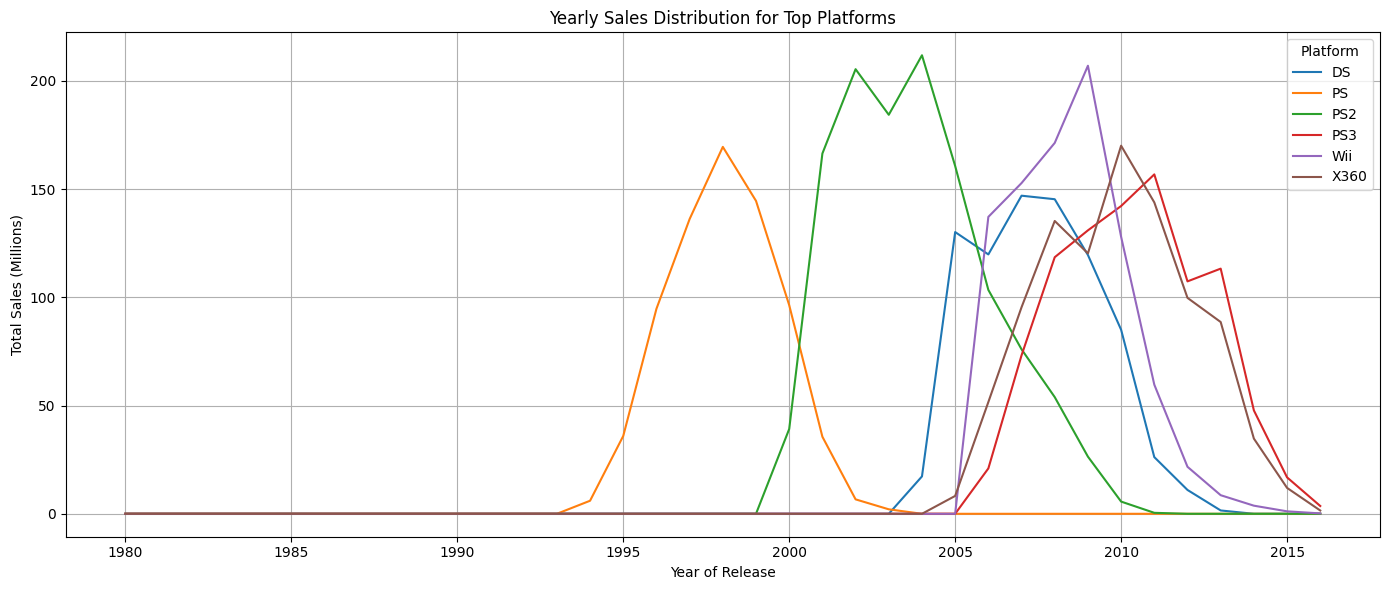

In [33]:
# platforms leading in sales

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_sales_by_year, x='year_of_release', y='total_sales', hue='platform')
plt.title('Yearly Sales Distribution for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


## 3.3 Determining Relevant Time Period

Determine the appropriate time period for predicting 2017 sales:

### Time Frame Selection

To make a prediction for 2017, I decided to focus on game sales data from 2012 to 2016. 

Using data from the most recent decade allows me to:
- Capture the performance of currently active platforms
- Reflect recent consumer behavior and platform cycles
- Avoid bias from outdated trends that no longer apply to the current market

This timeframe provides enough history to recognize patterns while staying recent enough to be relevant for a 2017 forecast.


In [34]:
# Filter the dataset to relevant years
relevant_years = [2012,2013,2014,2015,2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

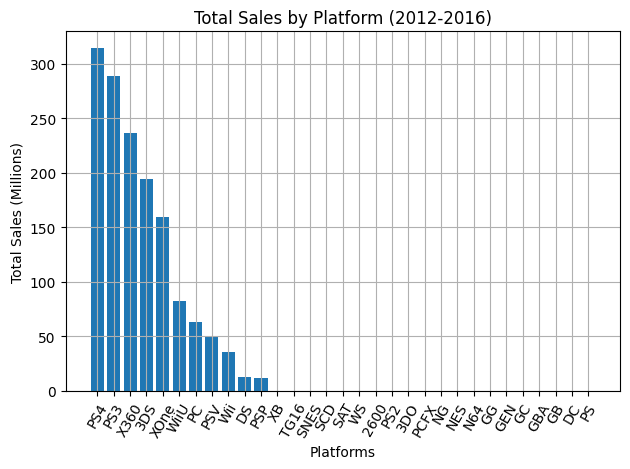

In [35]:
# Analyze platform sales trends
sales_trends_df= df_relevant.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
plt.bar(sales_trends_df['platform'],sales_trends_df['total_sales'])
plt.title('Total Sales by Platform (2012-2016)')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.grid(True)
plt.show()

In [36]:
# Sort platforms by total sales
platform_sort= df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sort

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
XB        0.00
TG16      0.00
SNES      0.00
SCD       0.00
SAT       0.00
WS        0.00
2600      0.00
PS2       0.00
3DO       0.00
PCFX      0.00
NG        0.00
NES       0.00
N64       0.00
GG        0.00
GEN       0.00
GC        0.00
GBA       0.00
GB        0.00
DC        0.00
PS        0.00
Name: total_sales, dtype: float64

In [37]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
top_platforms=platform_sort.head(5).index.to_list()
filtered=df_relevant[df_relevant['platform'].isin(top_platforms)].copy()
filtered['platform'] = filtered['platform'].astype('category')
filtered['platform'] = filtered['platform'].cat.remove_unused_categories()
platform_year_sales=filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_year_sales['yoy_growth']= platform_year_sales.groupby('platform')['total_sales'].pct_change()*100
platform_year_sales.sort_values(by='yoy_growth',ascending=False).head(44)

,platform,year_of_release,total_sales,yoy_growth
11,PS4,2013,25.99,inf
21,XOne,2013,18.96,inf
12,PS4,2014,100.00,284.763371
22,XOne,2014,54.07,185.179325
13,PS4,2015,118.90,18.900000
23,XOne,2015,60.14,11.226188
1,3DS,2013,56.57,10.144081
6,PS3,2013,113.25,5.486215
16,X360,2013,88.58,-11.189092
2,3DS,2014,43.76,-22.644511


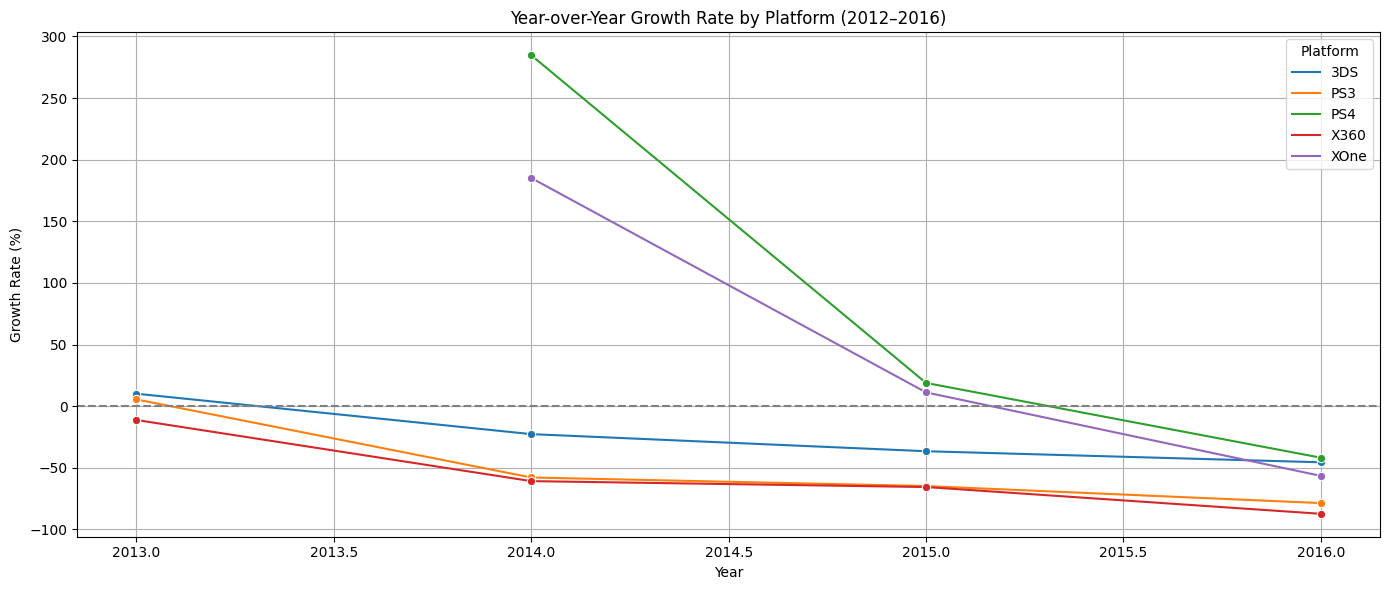

In [38]:
# Visualizing the 5 highest selling platforms YoY growth
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=platform_year_sales,
    x='year_of_release',
    y='yoy_growth',
    hue='platform',
    marker='o'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Year-over-Year Growth Rate by Platform (2012–2016)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

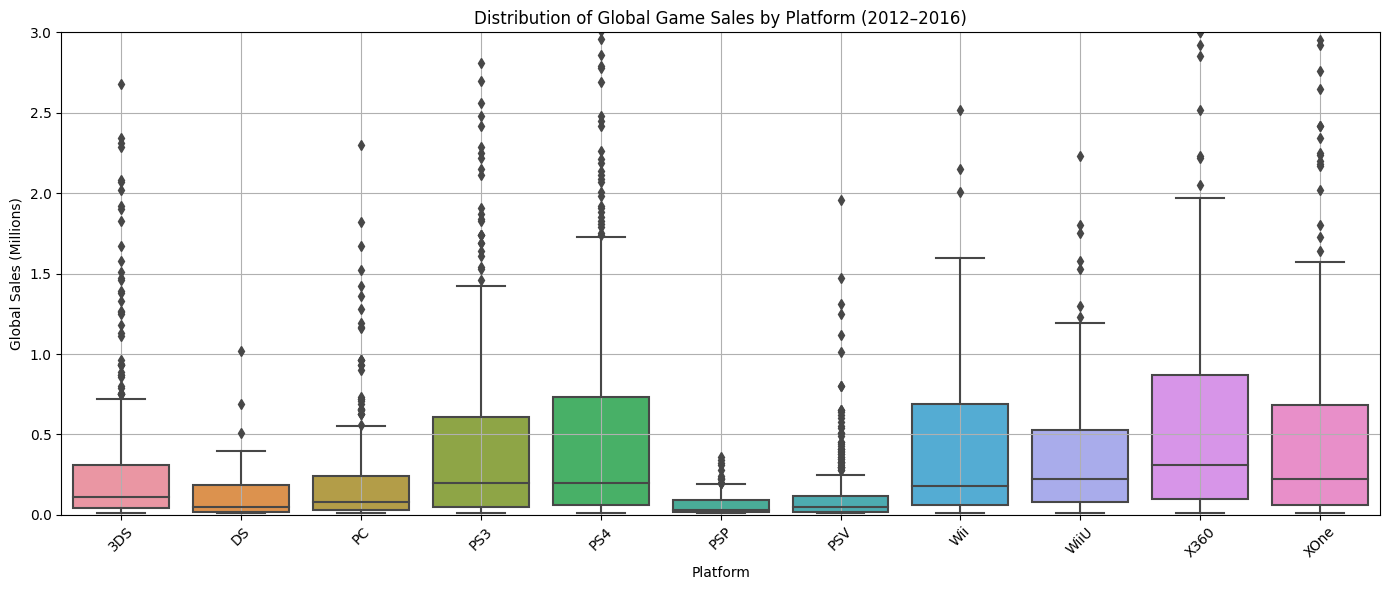

In [39]:
# Create box plot of sales by platform
group_sales=df_relevant.groupby('platform')['total_sales'].sum()
filter_zero_sales= group_sales[group_sales>0].index
filtered_zero_sales= df_relevant[df_relevant['platform'].isin(filter_zero_sales)]
filtered_zero_sales['platform']= filtered_zero_sales['platform'].cat.remove_unused_categories()
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_zero_sales, x='platform', y='total_sales')
plt.title('Distribution of Global Game Sales by Platform (2012–2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0,3)
plt.tight_layout()
plt.show()

In [40]:
# Calculating statistics for each platform between years 2007-2016
relevant_pivot = df_relevant.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'median','std','var'])
relevant_pivot

,mean,median,std,var
,total_sales,total_sales,total_sales,total_sales
platform,,,,
3DS,0.491439,0.11,1.387161,1.924217
DS,0.404839,0.05,1.439245,2.071426
PC,0.250600,0.08,0.494640,0.244669
PS3,0.585781,0.20,1.462855,2.139946
PS4,0.801378,0.20,1.609456,2.590350
PSP,0.064682,0.03,0.071296,0.005083
PSV,0.119659,0.05,0.203011,0.041214
Wii,0.655000,0.18,1.165447,1.358267


### Platform Sales Analysis (2012–2016)

As said previously, I decided to focus on data from 2012 to 2016. I chose this timeframe because using the most recent years, I could capture the rise and decline of platforms that were still relevant during this time without including outdated data that wouldn’t help in predicting future trends.

#### Top-Selling Platforms
From 2012 to 2016, the platforms with the highest total global sales were:
- **PS4**
- **PS3**
- **X360**
- **3DS**
- **XOne**

These platforms dominated, with PS4 being ahead in **overall sales**, but X360 having the highest **average sales per game** (~0.81M units), followed closely by PS4, Wii, and XOne. These averages shows which platforms had better overall consistent performances per title, not just in total units sold.

#### Year-over-Year Growth
When looking at **year-over-year growth** in global sales:
- All five top platforms showed **declining growth** over the years.
- **PS4** had a strong spike in growth in 2014, but even it started to slow down afterward. Although, it's also important to note that PS4 reached the highest total sales during the 2012–2016 period and did so in fewer years than PS3 or X360.

This trend confirms the typical platform life cycle; peaking after it launches, followed by a gradual decline. It also helps highlight which platforms still have momentum and which are aging out. 

#### Sales Distribution by Platform
A boxplot of global sales per platform showed:
- Most platforms had low **median** sales, but many had games that sold far above the average (outliers).
- **PS3**, in particular, stood out to me for having more frequent high-sellers.
- While the typical game didn’t sell much, a few were responsible for increasing the average on several platforms.
- Platforms like **DC, GC, PSP, and PSV** had lower median and mean sales, showing they were no longer competitive during my chosen timeframe.

#### Overall Observations So Far
- **PS3, X360, and Wii** performed well in the previous 5 years, but are nearing or past the end of their life cycles.
- **PS4 and XOne** were still relatively new, meaning they could continue performing into 2017 or beyond.
- While most platforms saw declining growth, the strongest going forward are the ones that still have life left in their cycle, especially PS4 and XOne. 

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [41]:
# Choose a popular platform based on your previous analysis
platform_popular= df_relevant[df_relevant['platform']=='X360']
platform_popular

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0,NaN,unrated,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,0,4.5,E,0.01
16460,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,0,6.2,T,0.01
16491,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,0,NaN,unrated,0.01
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49,2.1,T,0.01


In [42]:
# Creating 2 dataframes for user and critic scores
user_score_df= platform_popular[platform_popular['user_score']>0]
critic_score_df= platform_popular[platform_popular['critic_score']>0]

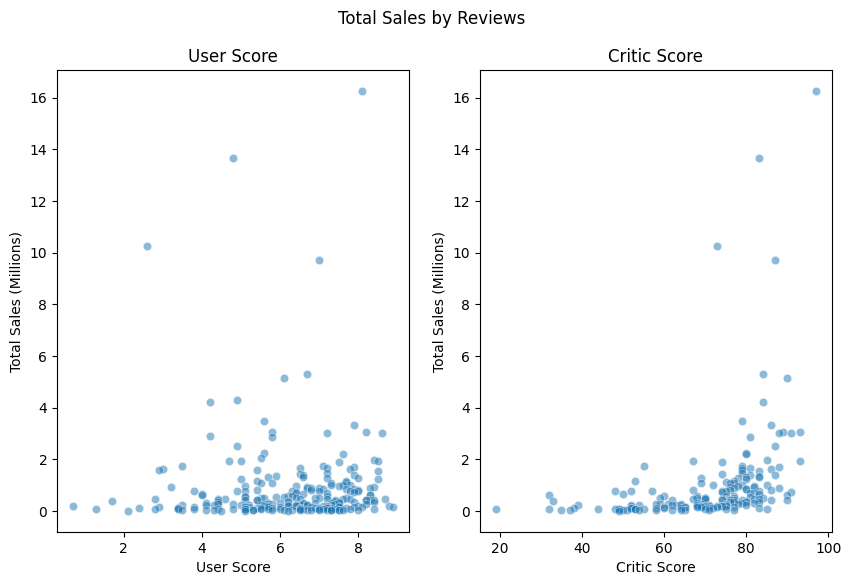

In [43]:
# Create scatter plots for both critic and user scores

figure, axis= plt.subplots(1,2,figsize=(10,6))
sns.scatterplot(data= user_score_df, x='user_score', y='total_sales', alpha=0.5, ax=axis[0])
sns.scatterplot(data= critic_score_df, x='critic_score', y= 'total_sales', alpha=0.5, ax=axis[1])
figure.suptitle('Total Sales by Reviews')
axis[0].set_title('User Score')
axis[1].set_title('Critic Score')
axis[0].set_xlabel('User Score')
axis[0].set_ylabel('Total Sales (Millions)')
axis[1].set_xlabel('Critic Score')
axis[1].set_ylabel('Total Sales (Millions)')
plt.show()

In [44]:
# Calculate correlations
user_corr= platform_popular['user_score'].corr(platform_popular['total_sales'])
critic_corr= platform_popular['critic_score'].corr(platform_popular['total_sales'])
print(user_corr, critic_corr)

0.006163978646213326 0.26202840220219653


**

### Do Reviews Influence Sales?

I looked at the correlation between total global sales and both user and critic scores for the X360 console.

- The correlation between **critic score and sales** was about **0.26**, which shows a weak positive relationship. This means games with higher critic reviews tended to sell slightly better, however, the connection isn't very strong.
- The correlation between **user score and sales** was close to **0**, meaning there's basically no relationship between what users rated a game and how well it sold.

This suggests that critic reviews may have a small influence on how well a game performs, while user reviews have little to no direct effect.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [45]:
top_sales_platforms= df_relevant.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
top_11= top_sales_platforms['platform'].head(11).tolist()
filtered_top_11=df_relevant[df_relevant['platform'].isin(top_11)]
filtered_top_11.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,NaN,unrated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [46]:
# Find games released on multiple of the top platforms
platform_count= filtered_top_11.groupby(['name'])['platform'].count().reset_index(name='platform_count')
multiple_platforms= platform_count[platform_count['platform_count']>5]
multiple_platforms.sort_values(by='platform_count', ascending=False)

,name,platform_count
433,FIFA 14,9
760,LEGO Marvel Super Heroes,9
1432,The LEGO Movie Videogame,8
773,Lego Batman 3: Beyond Gotham,8
60,Angry Birds Star Wars,8
434,FIFA 15,8
438,FIFA Soccer 13,8
763,LEGO The Hobbit,8
758,LEGO Jurassic World,8
764,LEGO The Lord of the Rings,7


In [47]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
multiple_platforms_games=multiple_platforms['name'].tolist()
filtered_games= filtered_top_11[filtered_top_11['name'].isin(multiple_platforms_games)]
multiple_group=filtered_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
multiple_platforms_pivot=multiple_group.pivot_table(index='name', columns='platform',values='total_sales')
pivot_top=multiple_platforms_pivot[top_11]
print(pivot_top)

platform                                     PS4   PS3   X360   3DS  XOne  \
name                                                                        
Adventure Time: Finn & Jake Investigations  0.10  0.08   0.09  0.09  0.05   
Angry Birds Star Wars                       0.22  0.29   0.28  0.33  0.17   
Assassin's Creed IV: Black Flag             2.86  3.71   3.31  0.00  2.24   
Call of Duty: Ghosts                        3.83  9.36  10.24  0.00  2.92   
Darksiders II                               0.23  0.85   0.79  0.00  0.07   
Disney Infinity                             0.00  0.97   1.44  0.29  0.00   
Disney Infinity 2.0: Marvel Super Heroes    0.62  0.95   1.08  0.00  0.44   
FIFA 14                                     3.01  6.46   4.22  0.23  1.16   
FIFA 15                                     6.08  4.28   2.92  0.46  2.18   
FIFA Soccer 13                              0.00  8.17   5.16  0.29  0.00   
Just Dance 2014                             0.42  0.37   0.99  0.00  0.45   

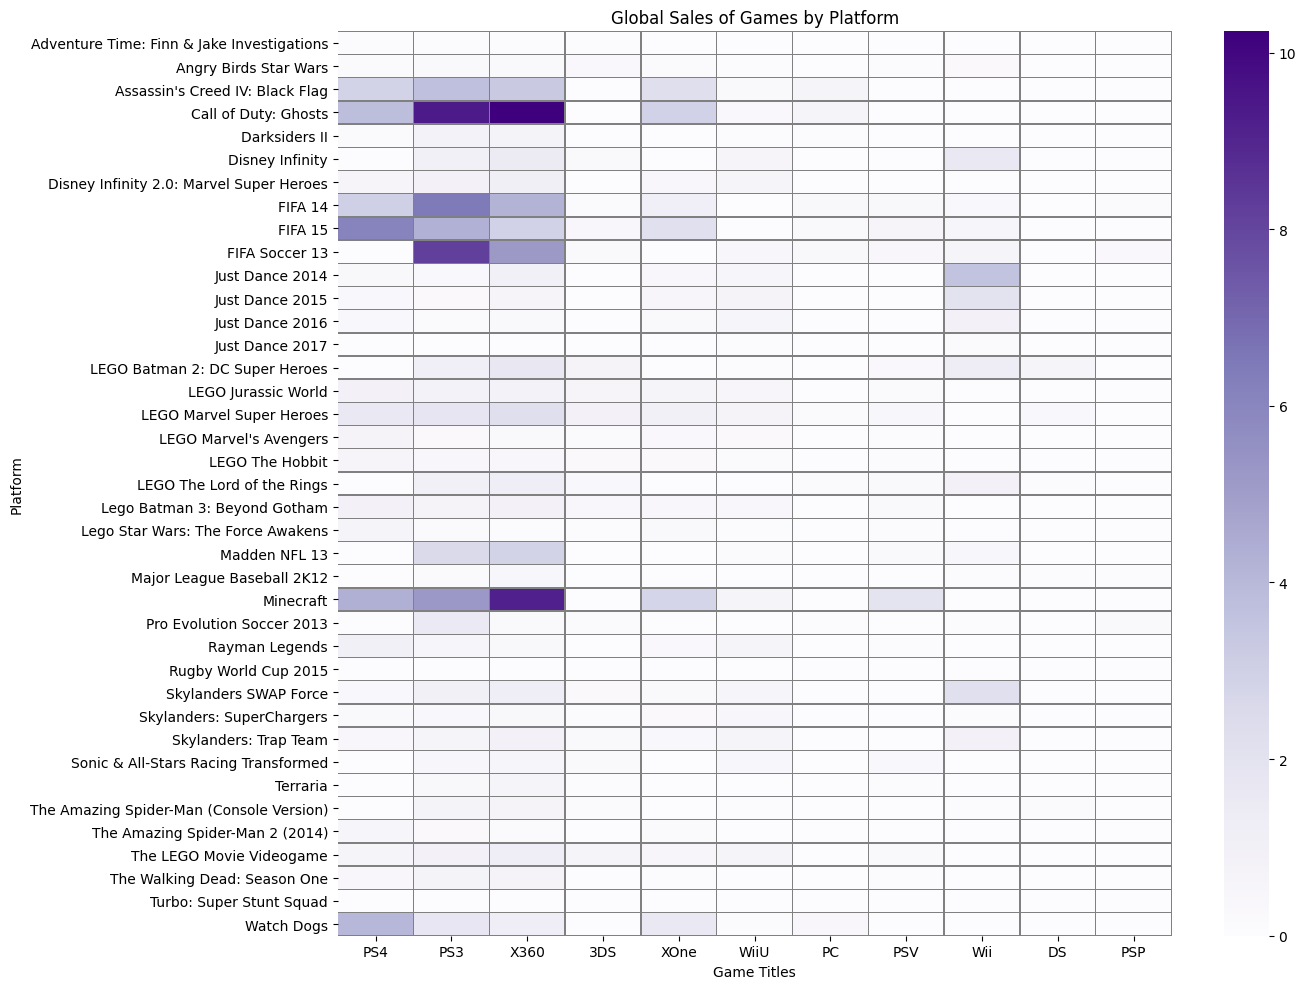

In [48]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_top, cmap="Purples", linewidths=0.3, linecolor="gray")
plt.title("Global Sales of Games by Platform")
plt.xlabel("Game Titles")        
plt.ylabel("Platform")          
plt.tight_layout()
plt.show()

In [49]:
# How many cross-platform game titles have their highest sells on each platform.
best_platform_per_game=pivot_top.idxmax(axis=1)
best_platform_wins=best_platform_per_game.value_counts()
best_platform_wins

X360    11
PS4     11
Wii      7
PS3      7
3DS      1
DS       1
WiiU     1
dtype: int64

### Cross-Platform Sales: Games Released on 6+ Platforms

I filtered the dataset to focus on games that were released on at least 6 of the top 11 platforms. This narrowed the scope to the most widely released titles, allowing a fair comparison of how these games performed across platforms.

- **X360 and PS4** consistently had the strongest sales across these titles.
- **FIFA games** stood out to me due to it dominating in sales across various platforms.
- Other platforms like **Wii** had wide game availability but didn't match the sales performance of PS3 or X360.

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [50]:
# Analyze genre performance
genre_count= df_relevant['genre'].value_counts()
genre_count

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

In [51]:
# Sort genres by total sales
genre_sales= df_relevant.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
genre_sales

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


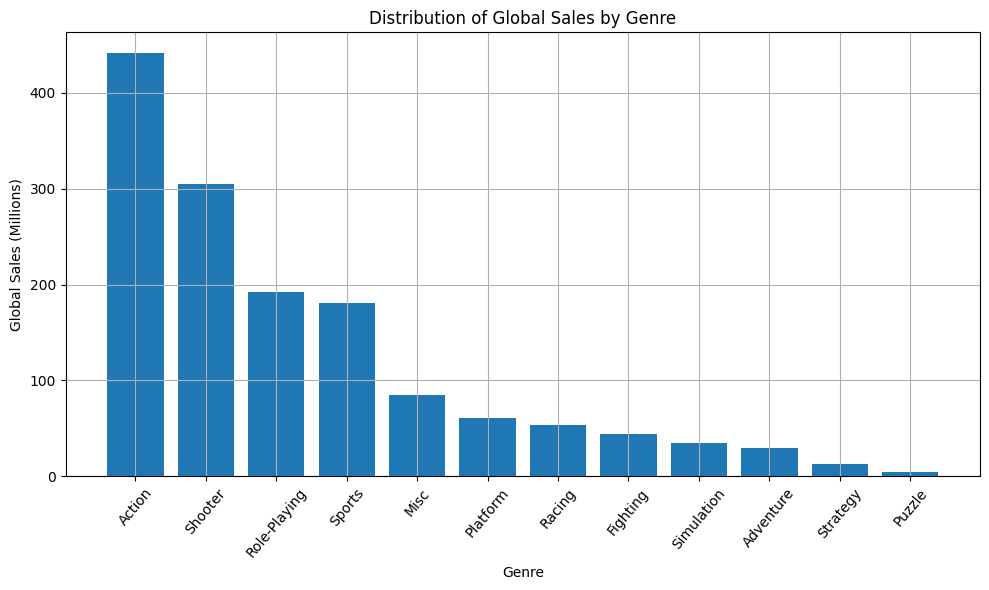

In [52]:
# Visualize genre distribution
plt.figure(figsize=(10,6))
plt.bar(genre_sales['genre'], genre_sales['total_sales'])
plt.title('Distribution of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=50)
plt.tight_layout()
plt.grid(True)
plt.show()

In [53]:
# Calculate market share for each genre
genre_count= df_relevant.groupby('genre')['genre'].count().reset_index(name='genre_count')
genre_count['market_share']= (genre_sales['total_sales']/genre_count['genre_count'])*100
genre_count.sort_values(by='market_share', ascending=False)

,genre,genre_count,market_share
8,Shooter,235,129.672340
4,Platform,85,71.764706
10,Sports,268,67.563433
7,Role-Playing,370,52.108108
6,Racing,115,46.521739
3,Misc,192,44.291667
9,Simulation,80,43.900000
0,Action,1031,42.785645
2,Fighting,109,40.816514
11,Strategy,71,18.788732


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

### Genre Sales and Market Share Analysis

**Action games** had the **highest global sales** overall, but they also had the most titles released. So while they're popular, their average sales per game aren't necessarily impressive.

**Shooter games** stood out to me. They had the **highest market share**, even though they had fewer titles than Action or Sports. This means that Shooter games tend to sell more copies per title.

Sports games also seemed to perform well, ranking high in both total sales and market share. They're consistent and seem to generate steady demand each year.

On the other end, genres like Adventure, Puzzle, and Strategy had both low sales and low market share. Even though a fair number of games were released in these categories, they didn't sell as well overall. These genres may appeal more to niche audiences.

Overall, genres like Shooter and Sports seem to offer a better return per title, while Action dominates in volume but not in performance.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [54]:
# Function to analyze platform performance by region
df_platform_na=df_relevant.groupby('platform')['na_sales'].sum().reset_index(name='na_sales').sort_values(by='na_sales', ascending=False)
df_platform_eu=df_relevant.groupby('platform')['eu_sales'].sum().reset_index(name='eu_sales').sort_values(by='eu_sales', ascending=False)
df_platform_jp=df_relevant.groupby('platform')['jp_sales'].sum().reset_index(name='jp_sales').sort_values(by='jp_sales', ascending=False)
print(df_platform_na.head())
print(df_platform_eu.head())
print(df_platform_jp.head())

   platform  na_sales
28     X360    140.05
18      PS4    108.74
17      PS3    103.38
30     XOne     93.12
2       3DS     55.31
   platform  eu_sales
18      PS4    141.09
17      PS3    106.86
28     X360     74.52
30     XOne     51.59
2       3DS     42.64
   platform  jp_sales
2       3DS     87.79
17      PS3     35.29
20      PSV     21.04
18      PS4     15.96
27     WiiU     13.01


In [55]:
# Analyze each region
na_platform= df_relevant[['platform','na_sales']]
eu_platform= df_relevant[['platform','eu_sales']]
jp_platform= df_relevant[['platform', 'jp_sales']]
na_count= na_platform.groupby('platform')['platform'].count().reset_index(name='platform_count')
eu_count= eu_platform.groupby('platform')['platform'].count().reset_index(name='platform_count')
jp_count= jp_platform.groupby('platform')['platform'].count().reset_index(name='platform_count')
print(na_count.head())
print(eu_count.head())
print(jp_count.head())

  platform  platform_count
0     2600               0
1      3DO               0
2      3DS             396
3       DC               0
4       DS              31
  platform  platform_count
0     2600               0
1      3DO               0
2      3DS             396
3       DC               0
4       DS              31
  platform  platform_count
0     2600               0
1      3DO               0
2      3DS             396
3       DC               0
4       DS              31


In [56]:
# Calulating market share per platform and region
na_count['market_share']= (df_platform_na['na_sales']/na_count['platform_count'])*100
eu_count['market_share']= (df_platform_eu['eu_sales']/eu_count['platform_count'])*100
jp_count['market_share']= (df_platform_jp['jp_sales']/jp_count['platform_count'])*100
df_na=df_platform_na.merge(na_count, on='platform', how='outer')
df_eu=df_platform_eu.merge(eu_count, on='platform', how='outer')
df_jp=df_platform_jp.merge(jp_count, on='platform', how='outer')
df_na.sort_values(by='market_share', ascending=False)

,platform,na_sales,platform_count,market_share
0,X360,140.05,292,47.962329
3,XOne,93.12,247,37.700405
7,Wii,17.45,54,32.314815
1,PS4,108.74,392,27.739796
5,WiiU,38.10,147,25.918367
2,PS3,103.38,493,20.969574
9,DS,4.59,31,14.806452
4,3DS,55.31,396,13.967172
6,PC,19.12,250,7.648000
8,PSV,10.98,411,2.671533


In [57]:
df_eu.sort_values(by='market_share', ascending=False)

,platform,eu_sales,platform_count,market_share
0,PS4,141.09,392,35.992347
2,X360,74.52,292,25.520548
7,Wii,11.92,54,22.074074
1,PS3,106.86,493,21.675456
3,XOne,51.59,247,20.886640
6,WiiU,25.13,147,17.095238
5,PC,37.76,250,15.104000
9,DS,3.53,31,11.387097
4,3DS,42.64,396,10.767677
8,PSV,11.36,411,2.763990


In [58]:
df_jp.sort_values(by='market_share', ascending=False)

,platform,jp_sales,platform_count,market_share
0,3DS,87.79,396,22.169192
6,DS,3.72,31,12.000000
4,WiiU,13.01,147,8.850340
1,PS3,35.29,493,7.158215
7,Wii,3.39,54,6.277778
5,PSP,10.47,173,6.052023
2,PSV,21.04,411,5.119221
3,PS4,15.96,392,4.071429
8,X360,1.57,292,0.537671
9,XOne,0.34,247,0.137652


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [59]:
# Create a comparative platform analysis
platform_sales = df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
platform_sales.head()

,platform,na_sales,eu_sales,jp_sales
0,2600,0.00,0.00,0.00
1,3DO,0.00,0.00,0.00
2,3DS,55.31,42.64,87.79
3,DC,0.00,0.00,0.00
4,DS,4.59,3.53,3.72


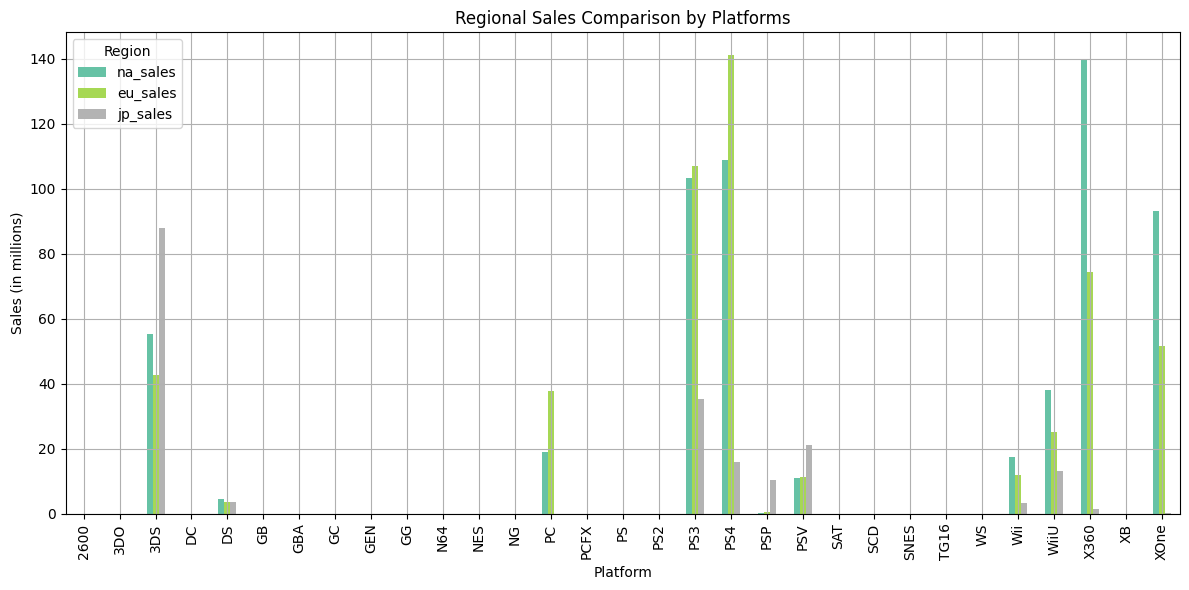

In [60]:
platform_sales.set_index('platform')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar', figsize=(12, 6), colormap='Set2'
)

plt.title('Regional Sales Comparison by Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [61]:
genre_na_df= df_relevant[['genre', 'na_sales']]
genre_sales_na=genre_na_df.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
genre_sales_na

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19
4,Platform,25.38
2,Fighting,19.79
6,Racing,17.22
1,Adventure,8.92
9,Simulation,7.97


In [62]:
genre_eu_df= df_relevant[['genre', 'eu_sales']]
genre_sales_eu=genre_eu_df.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
genre_sales_eu

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29
3,Misc,26.32
4,Platform,21.41
9,Simulation,14.55
2,Fighting,10.79
1,Adventure,9.46


In [63]:
genre_jp_df= df_relevant[['genre', 'jp_sales']]
genre_sales_jp=genre_jp_df.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
genre_sales_jp

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44
8,Shooter,9.23
4,Platform,8.63
1,Adventure,8.24
10,Sports,8.01
11,Strategy,2.88


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [64]:
# Create a comparative genre analysis
genre_sales = df_relevant.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
genre_sales.head()

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63


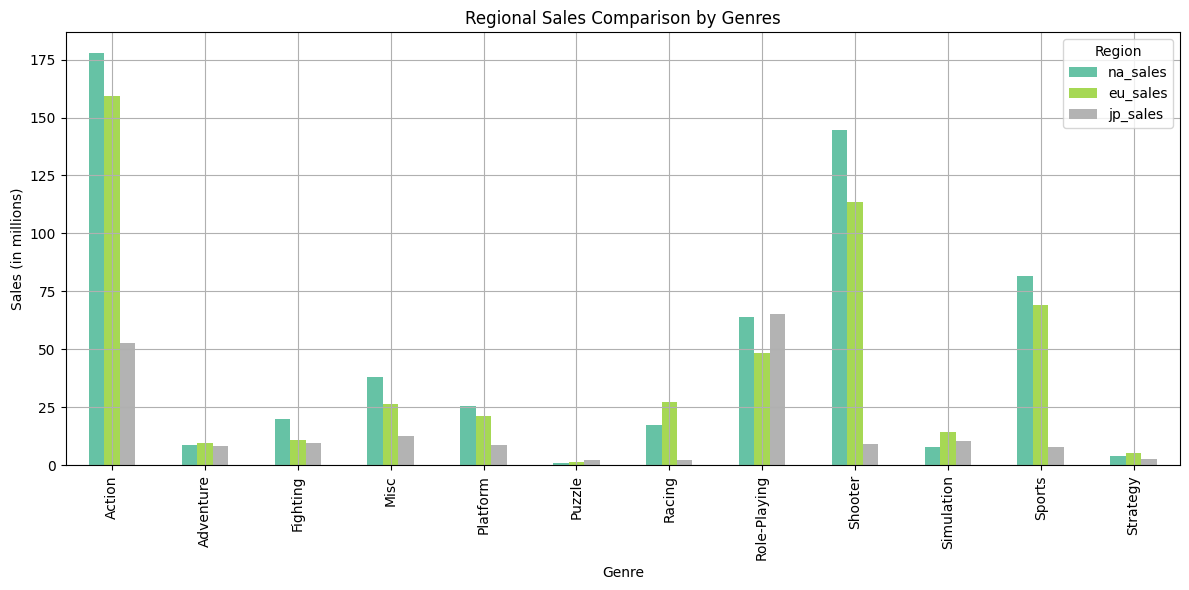

In [65]:
genre_sales.set_index('genre')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar', figsize=(12, 6), colormap='Set2'
)

plt.title('Regional Sales Comparison by Genres')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [66]:
rating_sales_na= df_relevant.groupby('rating')['na_sales'].sum().reset_index(name='na_sales').sort_values(by='na_sales', ascending=False)
rating_sales_na

,rating,na_sales
5,M,231.57
1,E,114.37
8,unrated,103.31
2,E10+,75.70
7,T,66.02
0,AO,0.00
3,EC,0.00
4,K-A,0.00
6,RP,0.00


In [67]:
rating_sales_eu= df_relevant.groupby('rating')['eu_sales'].sum().reset_index(name='eu_sales').sort_values(by='eu_sales', ascending=False)
rating_sales_eu

,rating,eu_sales
5,M,193.96
1,E,113.03
8,unrated,91.50
2,E10+,55.37
7,T,52.96
0,AO,0.00
3,EC,0.00
4,K-A,0.00
6,RP,0.00


In [68]:
rating_sales_jp= df_relevant.groupby('rating')['jp_sales'].sum().reset_index(name='jp_sales').sort_values(by='jp_sales', ascending=False)
rating_sales_jp

,rating,jp_sales
8,unrated,108.84
1,E,28.33
7,T,26.02
5,M,21.20
2,E10+,8.19
0,AO,0.00
3,EC,0.00
4,K-A,0.00
6,RP,0.00


In [69]:
rating_sales = df_relevant.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_sales.head()

,rating,na_sales,eu_sales,jp_sales
0,AO,0.00,0.00,0.00
1,E,114.37,113.03,28.33
2,E10+,75.70,55.37,8.19
3,EC,0.00,0.00,0.00
4,K-A,0.00,0.00,0.00


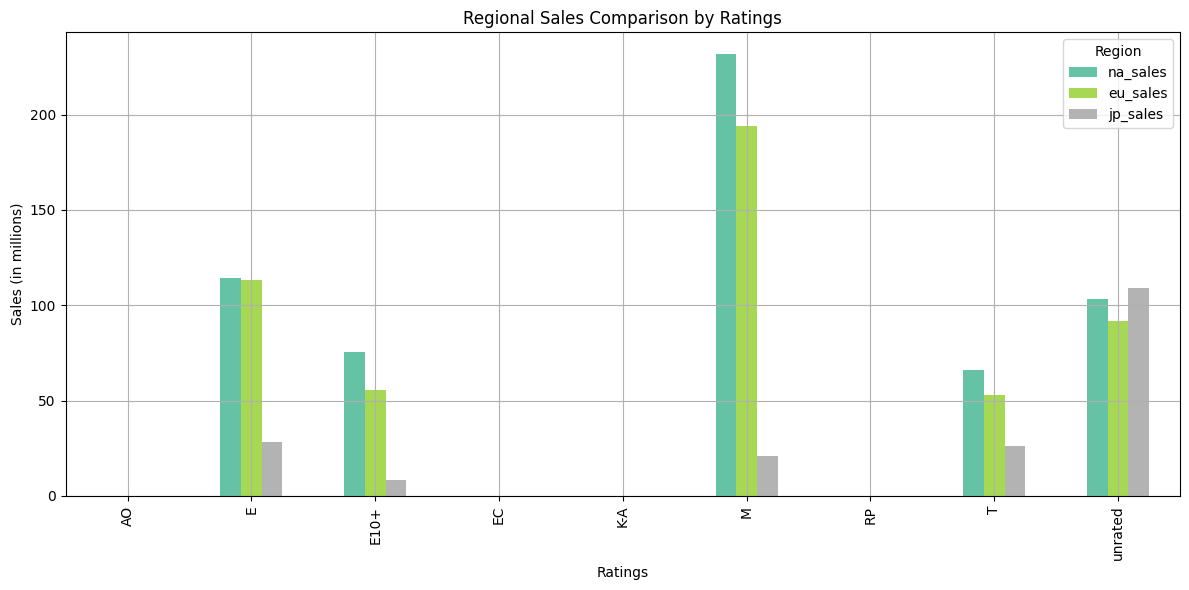

In [70]:
rating_sales.set_index('rating')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar', figsize=(12, 6), colormap='Set2'
)

plt.title('Regional Sales Comparison by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

### Regional Analysis (NA, EU, JP)

#### North America (NA)
The most popular platforms are of the X and PS series, followed by Wii. **Consoles dominated here**, with X360 having the highest sales. The top genres were **Action, Shooter, and Sports** — fast-paced, competitive, and family-friendly games seem to do best. ESRB ratings appear to influence sales, with **M, E, and unrated** games leading. Ratings like AO, EC, and RP had almost no data, likely because they’re rarely used.

#### Europe (EU)
Europe leaned a little more toward PlayStation, with PS4 leading over X360. **Genre preferences were similar to NA**: Action, Shooter, and Sports were the top 3. Ratings M, E, and unrated again led, similarly to NA.

#### Japan (JP)
Japan is very different. **Handheld consoles like DS and 3DS dominated**, and Xbox platforms performed very poorly. The top genre by far was **Role-Playing**, followed by **Action and Misc**. Sports and Shooter games didn’t perform well. Ratings were harder to evaluate in Japan — a lot of titles were missing ratings.

Overall, platform and genre preferences differ a lot by region, and while ratings seem to influence sales in NA and EU, they’re less clear in JP due to missing data.

# Step 5 : Hypothesis Tests




In [73]:
# Testing the hypothesis that the average user ratings of XOne & PC are the same.
filter_zero=df_relevant[df_relevant['user_score']>0]

xone_user_score= filter_zero[filter_zero['platform']=='XOne']['user_score']
pc_user_score= filter_zero[filter_zero['platform']=='PC']['user_score']

alpha= 0.05
results=st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)
print('P-value: ', results.pvalue)

if results.pvalue < alpha: 
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

P-value:  0.5489537965134912
We can't reject the null hypothesis.


In [74]:
# Testing the hypothesis that the average user ratings for action and sports genres are different.
action_user_score= filter_zero[filter_zero['genre']=='Action']['user_score']
sports_user_score= filter_zero[filter_zero['genre']=='Sports']['user_score']

alpha= 0.05
results=st.ttest_ind(action_user_score.dropna(), sports_user_score.dropna(), equal_var=False)
print('P-value: ', results.pvalue)

if results.pvalue < alpha: 
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

P-value:  4.24307776572644e-20
We reject the null hypothesis.


### Hypothesis Testing Summary

#### 1. Xbox One vs PC User Ratings

**Null Hypothesis (H₀):** The average user ratings for Xbox One and PC are the same.  
**Alternative Hypothesis (H₁):** The average user ratings for Xbox One and PC are different.

I used a t-test to compare the user scores for both platforms, using an alpha level of 0.05.

- **P-value:** ~0.55  
- Since the p-value is greater than 0.05, I **can't reject the null hypothesis**.

This means there is no statistically significant difference between the average user ratings for Xbox One and PC games.

---

#### 2. Action vs Sports Genre User Ratings

**Null Hypothesis (H₀):** The average user ratings for Action and Sports games are the same.  
**Alternative Hypothesis (H₁):** The average user ratings for Action and Sports games are different.

Again, I used a t-test with alpha = 0.05.

- **P-value:** 4.24e-20  
- This is much smaller than 0.05, so I **rejected the null hypothesis**.

This tells me that the difference in average user ratings between Action and Sports genres is significantly higher.

---

In the first test, the p-values were high enough to confidently say the average user ratings are **the same** between platforms compared. The second test, however, showed a difference between how user's rated genres. This shows that genre does factor into how games are rated by users and platform does not.


# Step 6. Write a general conclusion


### Final Conclusion

After analyzing game sales data up to 2016, several patterns stood out that can help guide future decisions about which platforms and genres to focus on, as well as how different regions respond to various types of games.

**Globally**, the most successful platforms were PS4, PS3, X360, 3DS, and XOne. These platforms dominated in total sales during the 2012–2016 window. However, when looking at year-over-year growth, all major platforms have started to show a decline. This suggests that newer platforms like PS4 and XOne might take over in 2017 and beyond.

**Genre-wise**, Action, Shooter, and Sports games brought in the most sales worldwide. Shooter games had the highest market share relative to the number of titles released, meaning they tend to generate more sales per game. On the other hand, genres like Puzzle, Strategy, and Adventure saw significantly lower sales.

Looking at **regional differences**:

- **North America and Europe** had similar tastes — preferring Action, Shooter, and Sports games — and shared a strong presence of Xbox and PlayStation platforms.
- **Japan**, however, was very different. The most popular platforms were handhelds like the DS and 3DS. The Role-Playing genre was the top performer there, showing a clear cultural preference.
- **ESRB ratings** also played a role, especially in NA and EU. Games rated M (Mature) and E (Everyone) dominated in sales. Japan's ratings data was more limited, possibly because ESRB isn’t the primary system used there.

Finally, I tested whether users rate platforms and genres differently. The results showed that:
- User ratings **don't differ statistically** between Xbox One and PC.
- There’s also a statistically significant difference between how users rate **Action vs Sports** games.

Overall, game success is influenced by a combination of platform, genre, region, and user sentiment. Future campaigns and game development strategies should take these factors into account to maximize reach and profitability.